In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

In [2]:
df = pd.read_csv("tmdb_5000_movies.csv")
df1 = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
df.shape

(4803, 20)

In [4]:
df1 = df1.rename(columns = {"movie_id":"id"})
df1

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


In [5]:
result = pd.merge(df,df1[['id','cast']],on = 'id')

In [6]:
result

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,"[{""cast_id"": 30, ""character"": ""Peter Parker / ..."
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo..."
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193

In [7]:
def json_to_list(col):
    for index, row in result.iterrows():
        row_list= []
        x = json.loads(row[col])
        for genre in x:
            row_list.append(genre['name'])
        result.at[index, col] = row_list



In [8]:
result.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."


In [9]:
cols =['genres', 'keywords', 'production_companies', 'production_countries','spoken_languages','cast']
for col in cols:
    json_to_list(col)

In [10]:
result.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,..."


In [11]:
def reduce_list(col):
    for index, row in result.iterrows():
        li = row[col]
        li = li[:3]
        result.at[index, col] = li


In [12]:
cols = ['genres','keywords','cast']
for col in cols:
    reduce_list(col)

In [13]:
result

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]"
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]"
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]"
3,250000000,"[Action, Crime, Drama]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman]"
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]"
5,258000000,"[Fantasy, Action, Adventure]",http://www.sonypictures.com/movies/spider-man3/,559,"[dual identity, amnesia, sandstorm]",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[Columbia Pictures, Laura Ziskin Productions, ...",...,2007-05-01,890871626,139.0,"[English, Français]",Released,The battle within.,Spider-Man 3,5.9,3576,"[Tobey Maguire, Kirsten Dunst, James Franco]"
6,260000000,"[Animation, Family]",http://disney.go.com/disneypictures/tangled/,38757,"[hostage, magic, horse]",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[Walt Disney Pictures, Walt Disney Animation S...",...,2010-11-24,591794936,100.0,[English],Released,They're taking adventure to new lengths.,Tangled,7.4,3330,"[Zachary Levi, Mandy Moore, Donna Murphy]"
7,280000000,"[Action, Adventure, Science Fiction]",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[marvel comic, sequel, superhero]",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[Marvel Studios, Prime Focus, Revolution Sun S...",...,2015-04-22,1405403694,141.0,[English],Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff..."
8,250000000,"[Adventure, Fantasy, Family]",http://harrypotter.warnerbros.com/harrypottera...,767,"[witch, magic, broom]",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[Warner Bros., Heyday Films]",...,2009-07-07,933959197,153.0,[English],Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,"[Daniel Radcliffe, Rupert Grint, Emma Watson]"
9,250000000,"[Action, Adventure, Fantasy]",h

In [14]:
result.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
dtype: int64

In [15]:
for i in range(len(result.index)) :
    print("Nan in row ", i , " : " ,  result.iloc[i].isnull().sum())

Nan in row  0  :  0
Nan in row  1  :  0
Nan in row  2  :  0
Nan in row  3  :  0
Nan in row  4  :  0
Nan in row  5  :  0
Nan in row  6  :  0
Nan in row  7  :  0
Nan in row  8  :  0
Nan in row  9  :  0
Nan in row  10  :  1
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  0
Nan in row  14  :  0
Nan in row  15  :  1
Nan in row  16  :  0
Nan in row  17  :  0
Nan in row  18  :  0
Nan in row  19  :  0
Nan in row  20  :  0
Nan in row  21  :  0
Nan in row  22  :  0
Nan in row  23  :  0
Nan in row  24  :  1
Nan in row  25  :  0
Nan in row  26  :  0
Nan in row  27  :  1
Nan in row  28  :  0
Nan in row  29  :  0
Nan in row  30  :  0
Nan in row  31  :  0
Nan in row  32  :  0
Nan in row  33  :  1
Nan in row  34  :  1
Nan in row  35  :  0
Nan in row  36  :  0
Nan in row  37  :  0
Nan in row  38  :  0
Nan in row  39  :  0
Nan in row  40  :  0
Nan in row  41  :  0
Nan in row  42  :  0
Nan in row  43  :  0
Nan in row  44  :  0
Nan in row  45  :  0
Nan in row  46  :  0
Nan in row  47  :  1
Na

Nan in row  597  :  0
Nan in row  598  :  0
Nan in row  599  :  1
Nan in row  600  :  1
Nan in row  601  :  1
Nan in row  602  :  2
Nan in row  603  :  1
Nan in row  604  :  0
Nan in row  605  :  0
Nan in row  606  :  0
Nan in row  607  :  0
Nan in row  608  :  1
Nan in row  609  :  0
Nan in row  610  :  1
Nan in row  611  :  0
Nan in row  612  :  0
Nan in row  613  :  1
Nan in row  614  :  0
Nan in row  615  :  1
Nan in row  616  :  1
Nan in row  617  :  0
Nan in row  618  :  1
Nan in row  619  :  0
Nan in row  620  :  1
Nan in row  621  :  0
Nan in row  622  :  0
Nan in row  623  :  0
Nan in row  624  :  1
Nan in row  625  :  0
Nan in row  626  :  1
Nan in row  627  :  1
Nan in row  628  :  1
Nan in row  629  :  1
Nan in row  630  :  1
Nan in row  631  :  0
Nan in row  632  :  0
Nan in row  633  :  1
Nan in row  634  :  0
Nan in row  635  :  1
Nan in row  636  :  1
Nan in row  637  :  0
Nan in row  638  :  0
Nan in row  639  :  1
Nan in row  640  :  1
Nan in row  641  :  0
Nan in row

Nan in row  1123  :  1
Nan in row  1124  :  1
Nan in row  1125  :  1
Nan in row  1126  :  1
Nan in row  1127  :  1
Nan in row  1128  :  1
Nan in row  1129  :  1
Nan in row  1130  :  1
Nan in row  1131  :  0
Nan in row  1132  :  0
Nan in row  1133  :  1
Nan in row  1134  :  1
Nan in row  1135  :  1
Nan in row  1136  :  1
Nan in row  1137  :  0
Nan in row  1138  :  1
Nan in row  1139  :  0
Nan in row  1140  :  1
Nan in row  1141  :  0
Nan in row  1142  :  0
Nan in row  1143  :  1
Nan in row  1144  :  2
Nan in row  1145  :  1
Nan in row  1146  :  0
Nan in row  1147  :  1
Nan in row  1148  :  1
Nan in row  1149  :  0
Nan in row  1150  :  0
Nan in row  1151  :  1
Nan in row  1152  :  0
Nan in row  1153  :  0
Nan in row  1154  :  0
Nan in row  1155  :  1
Nan in row  1156  :  1
Nan in row  1157  :  1
Nan in row  1158  :  0
Nan in row  1159  :  1
Nan in row  1160  :  0
Nan in row  1161  :  0
Nan in row  1162  :  0
Nan in row  1163  :  1
Nan in row  1164  :  1
Nan in row  1165  :  0
Nan in row 

Nan in row  1679  :  2
Nan in row  1680  :  0
Nan in row  1681  :  2
Nan in row  1682  :  0
Nan in row  1683  :  1
Nan in row  1684  :  1
Nan in row  1685  :  1
Nan in row  1686  :  1
Nan in row  1687  :  1
Nan in row  1688  :  1
Nan in row  1689  :  1
Nan in row  1690  :  0
Nan in row  1691  :  2
Nan in row  1692  :  1
Nan in row  1693  :  1
Nan in row  1694  :  1
Nan in row  1695  :  0
Nan in row  1696  :  0
Nan in row  1697  :  0
Nan in row  1698  :  2
Nan in row  1699  :  1
Nan in row  1700  :  0
Nan in row  1701  :  1
Nan in row  1702  :  1
Nan in row  1703  :  1
Nan in row  1704  :  0
Nan in row  1705  :  0
Nan in row  1706  :  1
Nan in row  1707  :  0
Nan in row  1708  :  1
Nan in row  1709  :  2
Nan in row  1710  :  1
Nan in row  1711  :  1
Nan in row  1712  :  1
Nan in row  1713  :  0
Nan in row  1714  :  1
Nan in row  1715  :  1
Nan in row  1716  :  1
Nan in row  1717  :  1
Nan in row  1718  :  1
Nan in row  1719  :  0
Nan in row  1720  :  1
Nan in row  1721  :  0
Nan in row 

Nan in row  2229  :  1
Nan in row  2230  :  1
Nan in row  2231  :  1
Nan in row  2232  :  1
Nan in row  2233  :  0
Nan in row  2234  :  0
Nan in row  2235  :  0
Nan in row  2236  :  1
Nan in row  2237  :  1
Nan in row  2238  :  0
Nan in row  2239  :  1
Nan in row  2240  :  0
Nan in row  2241  :  1
Nan in row  2242  :  0
Nan in row  2243  :  0
Nan in row  2244  :  1
Nan in row  2245  :  0
Nan in row  2246  :  1
Nan in row  2247  :  1
Nan in row  2248  :  2
Nan in row  2249  :  1
Nan in row  2250  :  1
Nan in row  2251  :  0
Nan in row  2252  :  1
Nan in row  2253  :  1
Nan in row  2254  :  0
Nan in row  2255  :  0
Nan in row  2256  :  2
Nan in row  2257  :  2
Nan in row  2258  :  1
Nan in row  2259  :  2
Nan in row  2260  :  1
Nan in row  2261  :  2
Nan in row  2262  :  1
Nan in row  2263  :  1
Nan in row  2264  :  0
Nan in row  2265  :  2
Nan in row  2266  :  1
Nan in row  2267  :  1
Nan in row  2268  :  2
Nan in row  2269  :  1
Nan in row  2270  :  0
Nan in row  2271  :  2
Nan in row 

Nan in row  2809  :  0
Nan in row  2810  :  1
Nan in row  2811  :  1
Nan in row  2812  :  1
Nan in row  2813  :  0
Nan in row  2814  :  1
Nan in row  2815  :  1
Nan in row  2816  :  1
Nan in row  2817  :  0
Nan in row  2818  :  1
Nan in row  2819  :  0
Nan in row  2820  :  1
Nan in row  2821  :  1
Nan in row  2822  :  1
Nan in row  2823  :  0
Nan in row  2824  :  1
Nan in row  2825  :  2
Nan in row  2826  :  1
Nan in row  2827  :  1
Nan in row  2828  :  1
Nan in row  2829  :  1
Nan in row  2830  :  1
Nan in row  2831  :  1
Nan in row  2832  :  0
Nan in row  2833  :  1
Nan in row  2834  :  0
Nan in row  2835  :  2
Nan in row  2836  :  1
Nan in row  2837  :  0
Nan in row  2838  :  1
Nan in row  2839  :  1
Nan in row  2840  :  1
Nan in row  2841  :  2
Nan in row  2842  :  1
Nan in row  2843  :  1
Nan in row  2844  :  0
Nan in row  2845  :  1
Nan in row  2846  :  0
Nan in row  2847  :  1
Nan in row  2848  :  2
Nan in row  2849  :  1
Nan in row  2850  :  1
Nan in row  2851  :  1
Nan in row 

Nan in row  3411  :  1
Nan in row  3412  :  1
Nan in row  3413  :  1
Nan in row  3414  :  0
Nan in row  3415  :  1
Nan in row  3416  :  0
Nan in row  3417  :  0
Nan in row  3418  :  0
Nan in row  3419  :  1
Nan in row  3420  :  1
Nan in row  3421  :  1
Nan in row  3422  :  2
Nan in row  3423  :  1
Nan in row  3424  :  1
Nan in row  3425  :  1
Nan in row  3426  :  2
Nan in row  3427  :  1
Nan in row  3428  :  1
Nan in row  3429  :  1
Nan in row  3430  :  1
Nan in row  3431  :  1
Nan in row  3432  :  1
Nan in row  3433  :  0
Nan in row  3434  :  1
Nan in row  3435  :  2
Nan in row  3436  :  0
Nan in row  3437  :  1
Nan in row  3438  :  1
Nan in row  3439  :  0
Nan in row  3440  :  0
Nan in row  3441  :  1
Nan in row  3442  :  1
Nan in row  3443  :  1
Nan in row  3444  :  1
Nan in row  3445  :  1
Nan in row  3446  :  1
Nan in row  3447  :  1
Nan in row  3448  :  1
Nan in row  3449  :  1
Nan in row  3450  :  1
Nan in row  3451  :  1
Nan in row  3452  :  2
Nan in row  3453  :  1
Nan in row 

Nan in row  3952  :  1
Nan in row  3953  :  2
Nan in row  3954  :  1
Nan in row  3955  :  1
Nan in row  3956  :  1
Nan in row  3957  :  0
Nan in row  3958  :  1
Nan in row  3959  :  1
Nan in row  3960  :  1
Nan in row  3961  :  1
Nan in row  3962  :  2
Nan in row  3963  :  1
Nan in row  3964  :  1
Nan in row  3965  :  2
Nan in row  3966  :  1
Nan in row  3967  :  1
Nan in row  3968  :  2
Nan in row  3969  :  2
Nan in row  3970  :  1
Nan in row  3971  :  2
Nan in row  3972  :  1
Nan in row  3973  :  1
Nan in row  3974  :  1
Nan in row  3975  :  1
Nan in row  3976  :  0
Nan in row  3977  :  2
Nan in row  3978  :  1
Nan in row  3979  :  0
Nan in row  3980  :  1
Nan in row  3981  :  1
Nan in row  3982  :  1
Nan in row  3983  :  1
Nan in row  3984  :  1
Nan in row  3985  :  1
Nan in row  3986  :  0
Nan in row  3987  :  1
Nan in row  3988  :  1
Nan in row  3989  :  1
Nan in row  3990  :  2
Nan in row  3991  :  1
Nan in row  3992  :  2
Nan in row  3993  :  2
Nan in row  3994  :  1
Nan in row 

Nan in row  4493  :  1
Nan in row  4494  :  1
Nan in row  4495  :  1
Nan in row  4496  :  0
Nan in row  4497  :  1
Nan in row  4498  :  1
Nan in row  4499  :  2
Nan in row  4500  :  2
Nan in row  4501  :  1
Nan in row  4502  :  2
Nan in row  4503  :  1
Nan in row  4504  :  2
Nan in row  4505  :  2
Nan in row  4506  :  1
Nan in row  4507  :  0
Nan in row  4508  :  1
Nan in row  4509  :  1
Nan in row  4510  :  2
Nan in row  4511  :  0
Nan in row  4512  :  2
Nan in row  4513  :  1
Nan in row  4514  :  1
Nan in row  4515  :  0
Nan in row  4516  :  1
Nan in row  4517  :  2
Nan in row  4518  :  1
Nan in row  4519  :  0
Nan in row  4520  :  2
Nan in row  4521  :  2
Nan in row  4522  :  1
Nan in row  4523  :  1
Nan in row  4524  :  0
Nan in row  4525  :  1
Nan in row  4526  :  0
Nan in row  4527  :  1
Nan in row  4528  :  0
Nan in row  4529  :  1
Nan in row  4530  :  1
Nan in row  4531  :  2
Nan in row  4532  :  2
Nan in row  4533  :  0
Nan in row  4534  :  1
Nan in row  4535  :  1
Nan in row 

In [16]:
result.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast
4798,220000,"[Action, Crime, Thriller]",NaN,9367,"[united states–mexico barrier, legs, arms]",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,[Columbia Pictures],...,1992-09-04,2040920,81.0,[Español],Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua..."
4799,9000,"[Comedy, Romance]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[Edward Burns, Kerry Bishé, Marsha Dietlein]"
4800,0,"[Comedy, Drama, Romance]",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[date, love at first sight, narration]",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[Front Street Pictures, Muse Entertainment Ent...",...,2013-10-13,0,120.0,[English],Released,NaN,"Signed, Sealed, Delivered",7.0,6,"[Eric Mabius, Kristin Booth, Crystal Lowe]"
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],...,2012-05-03,0,98.0,[English],Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,"[Daniel Henney, Eliza Coupe, Bill Paxton]"
4802,0,[Documentary],NaN,25975,"[obsession, camcorder, crush]",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[rusty bear entertainment, lucky crow films]",...,2005-08-05,0,90.0,[English],Released,NaN,My Date with Drew,6.3,16,"[Drew Barrymore, Brian Herzlinger, Corey Feldman]"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A83AFD0F0>,
      dtype=object)

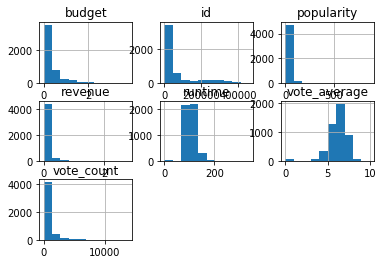

In [17]:
result.hist()

In [18]:
len(result.loc[(result['keywords'].str.len() == 0),:])

412

In [19]:
len(result.loc[(result['genres'].str.len() == 0),:])

28

In [20]:
result

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]"
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]"
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]"
3,250000000,"[Action, Crime, Drama]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman]"
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]"
5,258000000,"[Fantasy, Action, Adventure]",http://www.sonypictures.com/movies/spider-man3/,559,"[dual identity, amnesia, sandstorm]",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[Columbia Pictures, Laura Ziskin Productions, ...",...,2007-05-01,890871626,139.0,"[English, Français]",Released,The battle within.,Spider-Man 3,5.9,3576,"[Tobey Maguire, Kirsten Dunst, James Franco]"
6,260000000,"[Animation, Family]",http://disney.go.com/disneypictures/tangled/,38757,"[hostage, magic, horse]",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[Walt Disney Pictures, Walt Disney Animation S...",...,2010-11-24,591794936,100.0,[English],Released,They're taking adventure to new lengths.,Tangled,7.4,3330,"[Zachary Levi, Mandy Moore, Donna Murphy]"
7,280000000,"[Action, Adventure, Science Fiction]",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[marvel comic, sequel, superhero]",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[Marvel Studios, Prime Focus, Revolution Sun S...",...,2015-04-22,1405403694,141.0,[English],Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff..."
8,250000000,"[Adventure, Fantasy, Family]",http://harrypotter.warnerbros.com/harrypottera...,767,"[witch, magic, broom]",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[Warner Bros., Heyday Films]",...,2009-07-07,933959197,153.0,[English],Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,"[Daniel Radcliffe, Rupert Grint, Emma Watson]"
9,250000000,"[Action, Adventure, Fantasy]",h

In [21]:
result = result[['genres','keywords','overview','popularity','revenue','title','vote_average','vote_count','cast']]

In [22]:
result.dropna()

,genres,keywords,overview,popularity,revenue,title,vote_average,vote_count,cast
0,"[Action, Adventure, Fantasy]","[culture clash, future, space war]","In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]"
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]","Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]"
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent]",A cryptic message from Bond’s past sends him o...,107.376788,880674609,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]"
3,"[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]",Following the death of District Attorney Harve...,112.312950,1084939099,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman]"
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]","John Carter is a war-weary, former military ca...",43.926995,284139100,John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]"
5,"[Fantasy, Action, Adventure]","[dual identity, amnesia, sandstorm]",The seemingly invincible Spider-Man goes up ag...,115.699814,890871626,Spider-Man 3,5.9,3576,"[Tobey Maguire, Kirsten Dunst, James Franco]"
6,"[Animation, Family]","[hostage, magic, horse]",When the kingdom's most wanted-and most charmi...,48.681969,591794936,Tangled,7.4,3330,"[Zachary Levi, Mandy Moore, Donna Murphy]"
7,"[Action, Adventure, Science Fiction]","[marvel comic, sequel, superhero]",When Tony Stark tries to jumpstart a dormant p...,134.279229,1405403694,Avengers: Age of Ultron,7.3,6767,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff..."
8,"[Adventure, Fantasy, Family]","[witch, magic, broom]","As Harry begins his sixth year at Hogwarts, he...",98.885637,933959197,Harry Potter and the Half-Blood Prince,7.4,5293,"[Daniel Radcliffe, Rupert Grint, Emma Watson]"
9,"[Action, Adventure, Fantasy]","[dc comics, vigilante, superhero]",Fearing the actions of a god-like Super Hero l...,155.790452,873260194,Batman v Superman: Dawn of Justice,5.7,7004,"[Ben Affleck, Henry Cavill, Gal Gadot]"


In [23]:
cols = ['genres','keywords','cast']
for col in cols:
    result = result[result[col].map(lambda d: len(d)) > 0]

In [24]:
result

,genres,keywords,overview,popularity,revenue,title,vote_average,vote_count,cast
0,"[Action, Adventure, Fantasy]","[culture clash, future, space war]","In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]"
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]","Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]"
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent]",A cryptic message from Bond’s past sends him o...,107.376788,880674609,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]"
3,"[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]",Following the death of District Attorney Harve...,112.312950,1084939099,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman]"
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]","John Carter is a war-weary, former military ca...",43.926995,284139100,John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]"
5,"[Fantasy, Action, Adventure]","[dual identity, amnesia, sandstorm]",The seemingly invincible Spider-Man goes up ag...,115.699814,890871626,Spider-Man 3,5.9,3576,"[Tobey Maguire, Kirsten Dunst, James Franco]"
6,"[Animation, Family]","[hostage, magic, horse]",When the kingdom's most wanted-and most charmi...,48.681969,591794936,Tangled,7.4,3330,"[Zachary Levi, Mandy Moore, Donna Murphy]"
7,"[Action, Adventure, Science Fiction]","[marvel comic, sequel, superhero]",When Tony Stark tries to jumpstart a dormant p...,134.279229,1405403694,Avengers: Age of Ultron,7.3,6767,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff..."
8,"[Adventure, Fantasy, Family]","[witch, magic, broom]","As Harry begins his sixth year at Hogwarts, he...",98.885637,933959197,Harry Potter and the Half-Blood Prince,7.4,5293,"[Daniel Radcliffe, Rupert Grint, Emma Watson]"
9,"[Action, Adventure, Fantasy]","[dc comics, vigilante, superhero]",Fearing the actions of a god-like Super Hero l...,155.790452,873260194,Batman v Superman: Dawn of Justice,5.7,7004,"[Ben Affleck, Henry Cavill, Gal Gadot]"


In [25]:
result.describe()

,popularity,revenue,vote_average,vote_count
count,4380.000000,4.380000e+03,4380.000000,4380.000000
mean,23.212397,8.944242e+07,6.192900,751.321461
std,32.757844,1.685190e+08,1.007135,1275.413391
min,0.001117,0.000000e+00,0.000000,0.000000
25%,6.084852,0.000000e+00,5.700000,77.000000
50%,14.753434,2.549372e+07,6.300000,285.500000
75%,30.224542,1.018189e+08,6.800000,831.000000
max,875.581305,2.787965e+09,10.000000,13752.000000


In [26]:
result.isnull()

,genres,keywords,overview,popularity,revenue,title,vote_average,vote_count,cast
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [27]:
result

,genres,keywords,overview,popularity,revenue,title,vote_average,vote_count,cast
0,"[Action, Adventure, Fantasy]","[culture clash, future, space war]","In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]"
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]","Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]"
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent]",A cryptic message from Bond’s past sends him o...,107.376788,880674609,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]"
3,"[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]",Following the death of District Attorney Harve...,112.312950,1084939099,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman]"
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]","John Carter is a war-weary, former military ca...",43.926995,284139100,John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]"
5,"[Fantasy, Action, Adventure]","[dual identity, amnesia, sandstorm]",The seemingly invincible Spider-Man goes up ag...,115.699814,890871626,Spider-Man 3,5.9,3576,"[Tobey Maguire, Kirsten Dunst, James Franco]"
6,"[Animation, Family]","[hostage, magic, horse]",When the kingdom's most wanted-and most charmi...,48.681969,591794936,Tangled,7.4,3330,"[Zachary Levi, Mandy Moore, Donna Murphy]"
7,"[Action, Adventure, Science Fiction]","[marvel comic, sequel, superhero]",When Tony Stark tries to jumpstart a dormant p...,134.279229,1405403694,Avengers: Age of Ultron,7.3,6767,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff..."
8,"[Adventure, Fantasy, Family]","[witch, magic, broom]","As Harry begins his sixth year at Hogwarts, he...",98.885637,933959197,Harry Potter and the Half-Blood Prince,7.4,5293,"[Daniel Radcliffe, Rupert Grint, Emma Watson]"
9,"[Action, Adventure, Fantasy]","[dc comics, vigilante, superhero]",Fearing the actions of a god-like Super Hero l...,155.790452,873260194,Batman v Superman: Dawn of Justice,5.7,7004,"[Ben Affleck, Henry Cavill, Gal Gadot]"


In [28]:
result.sort_values(by = ['popularity'],inplace = True, ascending= False)

In [29]:
result

,genres,keywords,overview,popularity,revenue,title,vote_average,vote_count,cast
546,"[Family, Animation, Adventure]","[assistant, aftercreditsstinger, duringcredits...","Minions Stuart, Kevin and Bob are recruited by...",875.581305,1156730962,Minions,6.4,4571,"[Sandra Bullock, Jon Hamm, Michael Keaton]"
95,"[Adventure, Drama, Science Fiction]","[saving the world, artificial intelligence, fa...",Interstellar chronicles the adventures of a gr...,724.247784,675120017,Interstellar,8.1,10867,"[Matthew McConaughey, Jessica Chastain, Anne H..."
788,"[Action, Adventure, Comedy]","[anti hero, mercenary, marvel comic]",Deadpool tells the origin story of former Spec...,514.569956,783112979,Deadpool,7.4,10995,"[Ryan Reynolds, Morena Baccarin, Ed Skrein]"
94,"[Action, Science Fiction, Adventure]","[marvel comic, spaceship, space]","Light years from Earth, 26 years after being a...",481.098624,773328629,Guardians of the Galaxy,7.9,9742,"[Chris Pratt, Zoe Saldana, Dave Bautista]"
127,"[Action, Adventure, Science Fiction]","[future, chase, post-apocalyptic]",An apocalyptic story set in the furthest reach...,434.278564,378858340,Mad Max: Fury Road,7.2,9427,"[Tom Hardy, Charlize Theron, Nicholas Hoult]"
28,"[Action, Adventure, Science Fiction]","[monster, dna, tyrannosaurus rex]",Twenty-two years after the events of Jurassic ...,418.708552,1513528810,Jurassic World,6.5,8662,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan]"
199,"[Adventure, Fantasy, Action]","[exotic island, blacksmith, east india trading...","Jack Sparrow, a freewheeling 17th-century pira...",271.972889,655011224,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,"[Johnny Depp, Geoffrey Rush, Orlando Bloom]"
82,"[Science Fiction, Action, Drama]","[leader, colony, post-apocalyptic]",A group of scientists in San Francisco struggl...,243.791743,710644566,Dawn of the Planet of the Apes,7.3,4410,"[Andy Serkis, Jason Clarke, Gary Oldman]"
200,"[Science Fiction, Adventure, Thriller]","[resistance, post-apocalyptic, dystopia]",Katniss Everdeen reluctantly becomes the symbo...,206.227151,752100229,The Hunger Games: Mockingjay - Part 1,6.6,5584,"[Jennifer Lawrence, Josh Hutcherson, Liam Hems..."
88,"[Adventure, Family, Animation]","[brother brother relationship, hero, talent]",The special bond that develops between plus-si...,203.734590,652105443,Big Hero 6,7.8,6135,"[Scott Adsit, Ryan Potter, Daniel Henney]"


In [30]:
#df = df[df['vote_average'] >6]
result.shape

(4380, 9)

In [31]:
result = result.drop('overview',axis=1)

In [32]:
result

,genres,keywords,popularity,revenue,title,vote_average,vote_count,cast
546,"[Family, Animation, Adventure]","[assistant, aftercreditsstinger, duringcredits...",875.581305,1156730962,Minions,6.4,4571,"[Sandra Bullock, Jon Hamm, Michael Keaton]"
95,"[Adventure, Drama, Science Fiction]","[saving the world, artificial intelligence, fa...",724.247784,675120017,Interstellar,8.1,10867,"[Matthew McConaughey, Jessica Chastain, Anne H..."
788,"[Action, Adventure, Comedy]","[anti hero, mercenary, marvel comic]",514.569956,783112979,Deadpool,7.4,10995,"[Ryan Reynolds, Morena Baccarin, Ed Skrein]"
94,"[Action, Science Fiction, Adventure]","[marvel comic, spaceship, space]",481.098624,773328629,Guardians of the Galaxy,7.9,9742,"[Chris Pratt, Zoe Saldana, Dave Bautista]"
127,"[Action, Adventure, Science Fiction]","[future, chase, post-apocalyptic]",434.278564,378858340,Mad Max: Fury Road,7.2,9427,"[Tom Hardy, Charlize Theron, Nicholas Hoult]"
28,"[Action, Adventure, Science Fiction]","[monster, dna, tyrannosaurus rex]",418.708552,1513528810,Jurassic World,6.5,8662,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan]"
199,"[Adventure, Fantasy, Action]","[exotic island, blacksmith, east india trading...",271.972889,655011224,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,"[Johnny Depp, Geoffrey Rush, Orlando Bloom]"
82,"[Science Fiction, Action, Drama]","[leader, colony, post-apocalyptic]",243.791743,710644566,Dawn of the Planet of the Apes,7.3,4410,"[Andy Serkis, Jason Clarke, Gary Oldman]"
200,"[Science Fiction, Adventure, Thriller]","[resistance, post-apocalyptic, dystopia]",206.227151,752100229,The Hunger Games: Mockingjay - Part 1,6.6,5584,"[Jennifer Lawrence, Josh Hutcherson, Liam Hems..."
88,"[Adventure, Family, Animation]","[brother brother relationship, hero, talent]",203.734590,652105443,Big Hero 6,7.8,6135,"[Scott Adsit, Ryan Potter, Daniel Henney]"


In [33]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
   
       

    
    
        
    
    

In [34]:
features = ['cast', 'keywords', 'genres']

for feature in features:
    result[feature] = result[feature].apply(clean_data)

In [35]:
result

,genres,keywords,popularity,revenue,title,vote_average,vote_count,cast
546,"[family, animation, adventure]","[assistant, aftercreditsstinger, duringcredits...",875.581305,1156730962,Minions,6.4,4571,"[sandrabullock, jonhamm, michaelkeaton]"
95,"[adventure, drama, sciencefiction]","[savingtheworld, artificialintelligence, fathe...",724.247784,675120017,Interstellar,8.1,10867,"[matthewmcconaughey, jessicachastain, annehath..."
788,"[action, adventure, comedy]","[antihero, mercenary, marvelcomic]",514.569956,783112979,Deadpool,7.4,10995,"[ryanreynolds, morenabaccarin, edskrein]"
94,"[action, sciencefiction, adventure]","[marvelcomic, spaceship, space]",481.098624,773328629,Guardians of the Galaxy,7.9,9742,"[chrispratt, zoesaldana, davebautista]"
127,"[action, adventure, sciencefiction]","[future, chase, post-apocalyptic]",434.278564,378858340,Mad Max: Fury Road,7.2,9427,"[tomhardy, charlizetheron, nicholashoult]"
28,"[action, adventure, sciencefiction]","[monster, dna, tyrannosaurusrex]",418.708552,1513528810,Jurassic World,6.5,8662,"[chrispratt, brycedallashoward, irrfankhan]"
199,"[adventure, fantasy, action]","[exoticisland, blacksmith, eastindiatradingcom...",271.972889,655011224,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,"[johnnydepp, geoffreyrush, orlandobloom]"
82,"[sciencefiction, action, drama]","[leader, colony, post-apocalyptic]",243.791743,710644566,Dawn of the Planet of the Apes,7.3,4410,"[andyserkis, jasonclarke, garyoldman]"
200,"[sciencefiction, adventure, thriller]","[resistance, post-apocalyptic, dystopia]",206.227151,752100229,The Hunger Games: Mockingjay - Part 1,6.6,5584,"[jenniferlawrence, joshhutcherson, liamhemsworth]"
88,"[adventure, family, animation]","[brotherbrotherrelationship, hero, talent]",203.734590,652105443,Big Hero 6,7.8,6135,"[scottadsit, ryanpotter, danielhenney]"


In [36]:
result['genres'][0]

['action', 'adventure', 'fantasy']

In [37]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + ' '.join(x['genres'])
result['soup'] = result.apply(create_soup, axis=1)
    

In [38]:
result['soup'][0]

'cultureclash future spacewar samworthington zoesaldana sigourneyweaver action adventure fantasy'

In [39]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(result['soup'])

In [40]:
sig = sigmoid_kernel(count_matrix,count_matrix)

In [41]:
result = result.reset_index()
indices = pd.Series(result.index, index=result['title'])

In [42]:
def get_recommendations(title, sig=sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    sig_scores = sig_scores[1:11]  
    movie_indices = [i[0] for i in sig_scores]
    return result['title'].iloc[movie_indices]

In [44]:
get_recommendations('The Avengers')

11              Captain America: Civil War
36                 Avengers: Age of Ultron
176                             Iron Man 2
187     Captain America: The First Avenger
209    Captain America: The Winter Soldier
288                    The Incredible Hulk
3                  Guardians of the Galaxy
49                                Iron Man
50                                 Ant-Man
174                             Iron Man 3
Name: title, dtype: object